In [97]:
# Melakukan import libraries yang akan digunakan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from feature_engine.outliers import Winsorizer
from phik import phik_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from kmodes.kprototypes import KPrototypes
import pickle
import json

In [98]:
data = pd.read_csv('properties_data.csv')
data

,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,...,False,False,True,False,False,False,False,False,True,False
1,6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,...,False,False,True,True,False,False,False,False,True,False
2,6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,Medium,...,False,True,True,True,False,False,False,True,True,True
3,6326063,Culture Village,25.227295,55.341761,2850000,2020,1410.89,2,3,Low,...,False,False,False,False,False,False,False,False,False,False
4,6356778,Palm Jumeirah,25.114275,55.139764,1729200,507,3410.65,0,1,Medium,...,False,True,True,True,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,7705450,Mohammed Bin Rashid City,25.176892,55.310712,1500000,1087,1379.94,2,2,Ultra,...,False,True,True,True,True,True,True,True,True,True
1901,7706287,Mohammed Bin Rashid City,25.166145,55.276684,1230000,760,1618.42,1,2,Medium,...,False,False,True,True,False,False,False,False,True,True
1902,7706389,Dubai Creek Harbour (The Lagoons),25.206500,55.345056,2900000,1930,1502.59,3,5,Medium,...,False,False,False,True,False,False,False,False,False,False
1903,7706591,Jumeirah Village Circle,25.073858,55.229844,675000,740,912.16,1,2,Medium,...,False,True,True,True,False,False,False,False,True,True


In [99]:
# Melihat apakah dataset terdapat data duplikat atau tidak
data.duplicated().sum()

0

In [100]:
# Melihat apakah dataset terdapat missing value atau tidak
data.isna().sum()

id                     0
neighborhood           0
latitude               0
longitude              0
price                  0
size_in_sqft           0
price_per_sqft         0
no_of_bedrooms         0
no_of_bathrooms        0
quality                0
maid_room              0
unfurnished            0
balcony                0
barbecue_area          0
built_in_wardrobes     0
central_ac             0
childrens_play_area    0
childrens_pool         0
concierge              0
covered_parking        0
kitchen_appliances     0
lobby_in_building      0
maid_service           0
networked              0
pets_allowed           0
private_garden         0
private_gym            0
private_jacuzzi        0
private_pool           0
security               0
shared_gym             0
shared_pool            0
shared_spa             0
study                  0
vastu_compliant        0
view_of_landmark       0
view_of_water          0
walk_in_closet         0
dtype: int64

In [101]:
# Membuat dataframe baru yang berisi setiap kolom kecuali kolom CUST_ID
data = data.drop(['id', 'latitude', 'longitude'], axis=1)
data.head()

,neighborhood,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,maid_room,unfurnished,balcony,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,Palm Jumeirah,2700000,1079,2502.32,1,2,Medium,False,False,True,...,False,False,True,False,False,False,False,False,True,False
1,Palm Jumeirah,2850000,1582,1801.52,2,2,Medium,False,False,True,...,False,False,True,True,False,False,False,False,True,False
2,Jumeirah Lake Towers,1150000,1951,589.44,3,5,Medium,True,True,True,...,False,True,True,True,False,False,False,True,True,True
3,Culture Village,2850000,2020,1410.89,2,3,Low,False,True,True,...,False,False,False,False,False,False,False,False,False,False
4,Palm Jumeirah,1729200,507,3410.65,0,1,Medium,False,False,False,...,False,True,True,True,True,False,False,True,True,False


In [102]:
cek_korelasi = data
final_column = cek_korelasi.phik_matrix()['price'] >= 0.1
final_column = final_column[final_column==True]
final_column = final_column.index.tolist()
final_column

interval columns not set, guessing: ['price', 'size_in_sqft', 'price_per_sqft', 'no_of_bedrooms', 'no_of_bathrooms']


['neighborhood',
 'price',
 'size_in_sqft',
 'price_per_sqft',
 'no_of_bedrooms',
 'no_of_bathrooms',
 'maid_room',
 'concierge',
 'pets_allowed',
 'private_garden',
 'private_gym',
 'private_jacuzzi',
 'private_pool',
 'shared_pool']

In [103]:
data = data[final_column]
data

,neighborhood,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,maid_room,concierge,pets_allowed,private_garden,private_gym,private_jacuzzi,private_pool,shared_pool
0,Palm Jumeirah,2700000,1079,2502.32,1,2,False,True,True,False,False,False,False,False
1,Palm Jumeirah,2850000,1582,1801.52,2,2,False,False,False,False,False,False,False,True
2,Jumeirah Lake Towers,1150000,1951,589.44,3,5,True,False,False,False,False,True,False,True
3,Culture Village,2850000,2020,1410.89,2,3,False,True,True,False,False,False,False,False
4,Palm Jumeirah,1729200,507,3410.65,0,1,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,Mohammed Bin Rashid City,1500000,1087,1379.94,2,2,False,True,True,False,False,False,False,True
1901,Mohammed Bin Rashid City,1230000,760,1618.42,1,2,False,True,False,False,False,False,False,True
1902,Dubai Creek Harbour (The Lagoons),2900000,1930,1502.59,3,5,True,False,True,False,False,False,False,True
1903,Jumeirah Village Circle,675000,740,912.16,1,2,False,False,False,True,False,False,False,True


In [104]:
# Mengambil 1 data secara acak dari dataset yang akan dijadikan sebagai data inference ke dalam variabel data_inf
data_inf = data.sample(1, random_state=6)
# Menghapus data inference dari dataset
data.drop(data_inf.index, inplace=True)
# Melakukan reset index untuk data_inf dan dataset
data.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

C:\Users\ahmad\AppData\Local\Temp\ipykernel_21624\4079962775.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data_inf.index, inplace=True)


In [105]:
# Menyimpan data inference ke bentuk csv
data_inf.to_csv('data_inference.csv',index=False)

In [106]:
num_cols = ['price','size_in_sqft','price_per_sqft','no_of_bedrooms','no_of_bathrooms',]

cat_cols = ['neighborhood','maid_room','concierge','pets_allowed','private_garden','private_gym','private_jacuzzi','private_pool','shared_pool']

num_cols

['price',
 'size_in_sqft',
 'price_per_sqft',
 'no_of_bedrooms',
 'no_of_bathrooms']

In [107]:
df = data.copy()
df

,neighborhood,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,maid_room,concierge,pets_allowed,private_garden,private_gym,private_jacuzzi,private_pool,shared_pool
0,Palm Jumeirah,2700000,1079,2502.32,1,2,False,True,True,False,False,False,False,False
1,Palm Jumeirah,2850000,1582,1801.52,2,2,False,False,False,False,False,False,False,True
2,Jumeirah Lake Towers,1150000,1951,589.44,3,5,True,False,False,False,False,True,False,True
3,Culture Village,2850000,2020,1410.89,2,3,False,True,True,False,False,False,False,False
4,Palm Jumeirah,1729200,507,3410.65,0,1,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,Mohammed Bin Rashid City,1500000,1087,1379.94,2,2,False,True,True,False,False,False,False,True
1900,Mohammed Bin Rashid City,1230000,760,1618.42,1,2,False,True,False,False,False,False,False,True
1901,Dubai Creek Harbour (The Lagoons),2900000,1930,1502.59,3,5,True,False,True,False,False,False,False,True
1902,Jumeirah Village Circle,675000,740,912.16,1,2,False,False,False,True,False,False,False,True


In [108]:
# Membuat list skewed dan normal untuk menampung nama kolom
skewed = []
normal = []
# Menampilkan nilai skew setiap kolom menggunakan looping
for i in df[num_cols].columns.to_list():
    print(f'Kolom {i} Nilai skewnessnya: {data[i].skew()}')
    # memasukkan kolom ke dalam list berdasarkan nilai skewness
    if data[i].nunique()>10:
        if data[i].skew() > -0.5 and data[i].skew() < 0.5:
            normal.append(i)
        else:
            skewed.append(i)
    print('-'*80)

# Menampilkan kolom berdasarkan distribusinya
print('Kolom dengan distribusi skew: ', skewed)
print('Kolom dengan distribusi normal: ', normal)

Kolom price Nilai skewnessnya: 6.206390290422132
--------------------------------------------------------------------------------
Kolom size_in_sqft Nilai skewnessnya: 2.914081313715392
--------------------------------------------------------------------------------
Kolom price_per_sqft Nilai skewnessnya: 1.8464736221026894
--------------------------------------------------------------------------------
Kolom no_of_bedrooms Nilai skewnessnya: 0.2954536108980965
--------------------------------------------------------------------------------
Kolom no_of_bathrooms Nilai skewnessnya: 0.5668101140717706
--------------------------------------------------------------------------------
Kolom dengan distribusi skew:  ['price', 'size_in_sqft', 'price_per_sqft']
Kolom dengan distribusi normal:  []


In [109]:
# Melakukan outliers handling menggunakan metode capping
winsorizer_skewed = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=1.5,
                             variables=skewed)
df_capped = winsorizer_skewed.fit_transform(df)
df_capped.head()

,neighborhood,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,maid_room,concierge,pets_allowed,private_garden,private_gym,private_jacuzzi,private_pool,shared_pool
0,Palm Jumeirah,2700000.0,1079.0,2502.32000,1,2,False,True,True,False,False,False,False,False
1,Palm Jumeirah,2850000.0,1582.0,1801.52000,2,2,False,False,False,False,False,False,False,True
2,Jumeirah Lake Towers,1150000.0,1951.0,589.44000,3,5,True,False,False,False,False,True,False,True
3,Culture Village,2850000.0,2020.0,1410.89000,2,3,False,True,True,False,False,False,False,False
4,Palm Jumeirah,1729200.0,507.0,2746.69375,0,1,False,False,False,False,False,False,False,True


Kolom price sebelum dilakukan capping


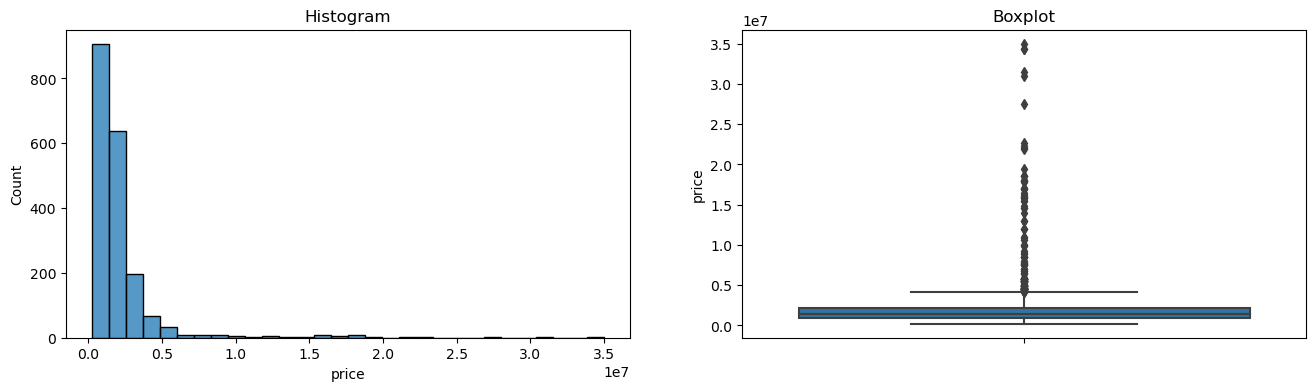


 Kolom price setelah dilakukan Capping


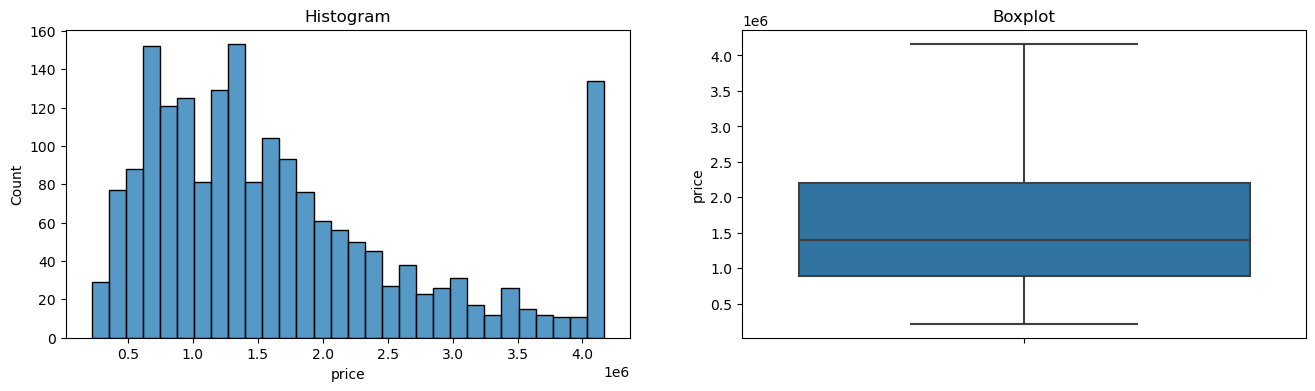

In [110]:
# Membuat fungsi untuk menampilkan histogram dan boxplot dari kolom 
def outliers_plots(df, variabel):    
    plt.figure(figsize=(16, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[variabel], bins=30)
    plt.title('Histogram')
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variabel])
    plt.title('Boxplot')
    plt.show()

# Melihat histogram dan boxplot kolom price(distribusi skewed)
print('Kolom price sebelum dilakukan capping')
outliers_plots(df, 'price')
print('\n Kolom price setelah dilakukan Capping')
outliers_plots(df_capped, 'price')

In [111]:
# Membuat data train dan test data numerik
df_capped_num = df_capped[num_cols]
# Membuat data train dan test data kategorikal
df_capped_cat = df_capped[cat_cols]
df_capped_cat

,neighborhood,maid_room,concierge,pets_allowed,private_garden,private_gym,private_jacuzzi,private_pool,shared_pool
0,Palm Jumeirah,False,True,True,False,False,False,False,False
1,Palm Jumeirah,False,False,False,False,False,False,False,True
2,Jumeirah Lake Towers,True,False,False,False,False,True,False,True
3,Culture Village,False,True,True,False,False,False,False,False
4,Palm Jumeirah,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...
1899,Mohammed Bin Rashid City,False,True,True,False,False,False,False,True
1900,Mohammed Bin Rashid City,False,True,False,False,False,False,False,True
1901,Dubai Creek Harbour (The Lagoons),True,False,True,False,False,False,False,True
1902,Jumeirah Village Circle,False,False,False,True,False,False,False,True


In [112]:
# Melakukan scaling menggunakan standard scaler
scaler = StandardScaler()
df_scaled_num = scaler.fit_transform(df_capped_num)
df_scaled_num

array([[ 0.95061277, -0.42189892,  2.16662074, -0.83533721, -0.48187717],
       [ 1.09303018,  0.34891314,  0.91064115,  0.21935911, -0.48187717],
       [-0.52103383,  0.91437963, -1.26165871,  1.27405542,  2.34408011],
       ...,
       [ 1.14050265,  0.88219861,  0.37489632,  1.27405542,  2.34408011],
       [-0.9720223 , -0.94139253, -0.68327724, -0.83533721, -0.48187717],
       [-0.89047694, -0.84944675, -0.61347073, -0.83533721, -0.48187717]])

In [113]:
# Mengurangi dimensi atau fitur dataset menggunakan PCA
pca = PCA()
pca.fit(df_scaled_num)

PCA()

In [114]:
# Check the number of features if we want to retain 95 % of the information
cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95) + 1
num_features

3

In [115]:
# Melakukan pengurangan dimensi/fitur hingga 10 fitur menggunakan pca
pca = PCA(n_components=num_features)
df_scaled_pca = pca.fit_transform(df_scaled_num)

In [116]:
df_final = np.concatenate([df_scaled_pca, df_capped_cat], axis=1)
df_final = pd.DataFrame(df_final, columns=[['PCA1', 'PCA2', 'PCA3'] + cat_cols])
df_final = df_final.infer_objects()
df_final

,PCA1,PCA2,PCA3,neighborhood,maid_room,concierge,pets_allowed,private_garden,private_gym,private_jacuzzi,private_pool,shared_pool
0,0.150691,2.570946,-0.004440,Palm Jumeirah,False,True,True,False,False,False,False,False
1,0.805090,1.114902,0.667454,Palm Jumeirah,False,False,False,False,False,False,False,True
2,1.617642,-2.394485,-1.143308,Jumeirah Lake Towers,True,False,False,False,False,True,False,True
3,1.407730,0.130857,0.539697,Culture Village,False,True,True,False,False,False,False,False
4,-1.580640,3.353159,-0.130033,Palm Jumeirah,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1899,-0.375003,0.226990,-0.007662,Mohammed Bin Rashid City,False,True,True,False,False,False,False,True
1900,-1.156236,0.894136,-0.375831,Mohammed Bin Rashid City,False,True,False,False,False,False,False,True
1901,2.810863,-0.460847,-1.001882,Dubai Creek Harbour (The Lagoons),True,False,True,False,False,False,False,True
1902,-1.738431,-0.328279,-0.279207,Jumeirah Village Circle,False,False,False,True,False,False,False,True


In [117]:
# Get the position of categorical columns
index_cat_columns = [df_final.columns.get_loc(col) for col in list(df_final.select_dtypes(include=[object,bool]).columns)]
print('Categorical columns        : ', cat_cols)
print('Categorical columns index  : ', index_cat_columns)

Categorical columns        :  ['neighborhood', 'maid_room', 'concierge', 'pets_allowed', 'private_garden', 'private_gym', 'private_jacuzzi', 'private_pool', 'shared_pool']
Categorical columns index  :  [3, 4, 5, 6, 7, 8, 9, 10, 11]


Cluster creation :  2
Cluster creation :  3
Cluster creation :  4
Cluster creation :  5
Cluster creation :  6


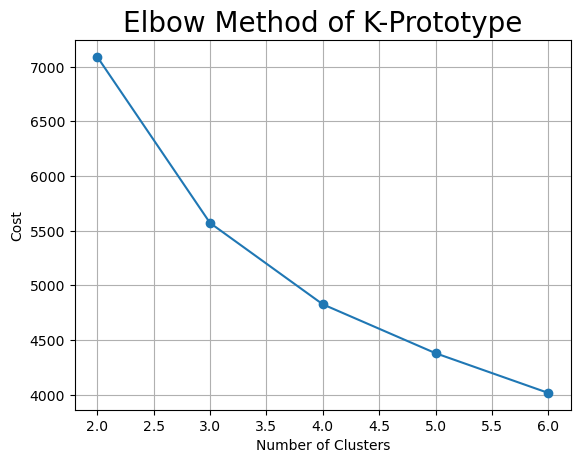

In [118]:
max_clusters = 6
cost = []
for k in range(2, max_clusters+1):
  kproto = KPrototypes(n_clusters=k, init='Huang', random_state=42, n_jobs=-1)
  kproto.fit_predict(df_final, categorical=index_cat_columns)
  cost.append(kproto.cost_)
  print('Cluster creation : ', k)

plt.plot(range(2, max_clusters+1), cost, marker ="o")
plt.grid()
plt.title('Elbow Method of K-Prototype', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.show()

In [119]:
kp = KPrototypes(n_clusters=3, random_state=42)
pred = kp.fit_predict(df_final, categorical=index_cat_columns)
pred

array([1, 2, 2, ..., 0, 1, 1], dtype=uint16)

In [120]:
data['cluster'] = pred
data

C:\Users\ahmad\AppData\Local\Temp\ipykernel_21624\2335801818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = pred


,neighborhood,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,maid_room,concierge,pets_allowed,private_garden,private_gym,private_jacuzzi,private_pool,shared_pool,cluster
0,Palm Jumeirah,2700000,1079,2502.32,1,2,False,True,True,False,False,False,False,False,1
1,Palm Jumeirah,2850000,1582,1801.52,2,2,False,False,False,False,False,False,False,True,2
2,Jumeirah Lake Towers,1150000,1951,589.44,3,5,True,False,False,False,False,True,False,True,2
3,Culture Village,2850000,2020,1410.89,2,3,False,True,True,False,False,False,False,False,2
4,Palm Jumeirah,1729200,507,3410.65,0,1,False,False,False,False,False,False,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,Mohammed Bin Rashid City,1500000,1087,1379.94,2,2,False,True,True,False,False,False,False,True,2
1900,Mohammed Bin Rashid City,1230000,760,1618.42,1,2,False,True,False,False,False,False,False,True,1
1901,Dubai Creek Harbour (The Lagoons),2900000,1930,1502.59,3,5,True,False,True,False,False,False,False,True,0
1902,Jumeirah Village Circle,675000,740,912.16,1,2,False,False,False,True,False,False,False,True,1


In [121]:
data.price_per_sqft.max()

4805.87

In [122]:
data.to_csv('data_cluster.csv')

<AxesSubplot:>

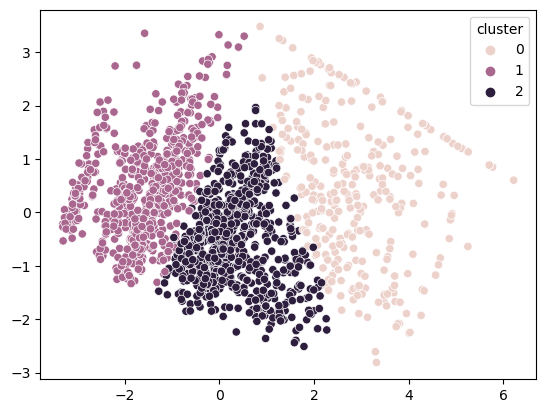

In [123]:
pca_2d = PCA(n_components=2)
pca_2d.fit(df_scaled_num)
df_scaled_num_pca_2d = pca_2d.fit_transform(df_scaled_num)
sns.scatterplot(x=df_scaled_num_pca_2d[:,0], y=df_scaled_num_pca_2d[:,1], hue=data['cluster'])

In [124]:
# Melihat nilai rata-rata setiap kolom/indikator berdasarkan cluster
data.groupby('cluster').mean()

,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,maid_room,concierge,pets_allowed,private_garden,private_gym,private_jacuzzi,private_pool,shared_pool
cluster,,,,,,,,,,,,,
0,5.698293e+06,2639.350148,2047.168398,3.017804,3.890208,0.290801,0.424332,0.172107,0.014837,0.011869,0.068249,0.086053,0.697329
1,9.810038e+05,797.907692,1235.002205,0.876923,1.606410,0.056410,0.337179,0.319231,0.019231,0.006410,0.053846,0.034615,0.779487
2,1.616516e+06,1502.412961,1108.251753,2.174079,2.818297,0.168996,0.346887,0.330368,0.013977,0.006353,0.040661,0.031766,0.712834


In [125]:
with open('model_scaler.pkl', 'wb') as file_1:
  pickle.dump(scaler, file_1)
with open('model_pca.pkl', 'wb') as file_2:
  pickle.dump(pca, file_2)
with open('model_kp.pkl', 'wb') as file_3:
  pickle.dump(kp, file_3)
with open('index_cols.txt', 'w') as file_4:
  json.dump(index_cat_columns, file_4)
with open('num_cols.txt', 'w') as file_5:
  json.dump(num_cols, file_5)
with open('cat_cols.txt', 'w') as file_6:
  json.dump(cat_cols, file_6)

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   neighborhood     1904 non-null   object 
 1   price            1904 non-null   int64  
 2   size_in_sqft     1904 non-null   int64  
 3   price_per_sqft   1904 non-null   float64
 4   no_of_bedrooms   1904 non-null   int64  
 5   no_of_bathrooms  1904 non-null   int64  
 6   maid_room        1904 non-null   bool   
 7   concierge        1904 non-null   bool   
 8   pets_allowed     1904 non-null   bool   
 9   private_garden   1904 non-null   bool   
 10  private_gym      1904 non-null   bool   
 11  private_jacuzzi  1904 non-null   bool   
 12  private_pool     1904 non-null   bool   
 13  shared_pool      1904 non-null   bool   
 14  cluster          1904 non-null   uint16 
dtypes: bool(8), float64(1), int64(4), object(1), uint16(1)
memory usage: 108.0+ KB
